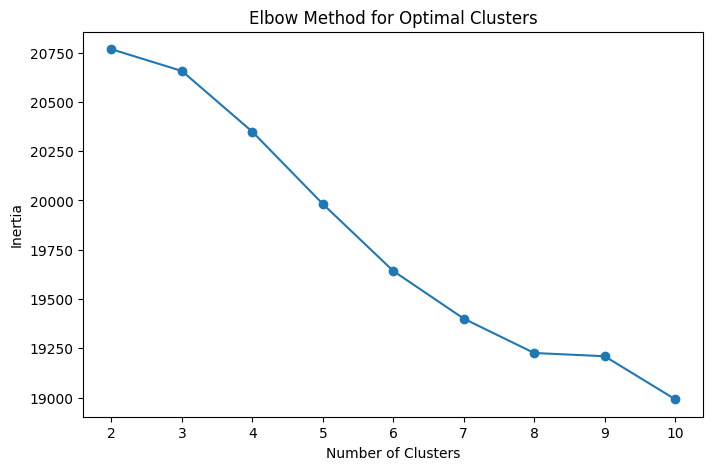

   TotalValue  Quantity  Region_Asia  Region_Europe  Region_North America  \
0     3354.52        12        False          False                 False   
1     1862.74        10         True          False                 False   
2     2725.38        14        False          False                 False   
3     5354.88        23        False          False                 False   
4     2034.24         7         True          False                 False   

   Region_South America  P001  P002  P003  P004  ...  P092  P093  P094  P095  \
0                  True     0     0     0     0  ...     0     0     0     0   
1                 False     0     0     0     1  ...     0     0     0     1   
2                  True     0     1     0     0  ...     0     0     0     0   
3                  True     0     0     0     0  ...     0     0     0     0   
4                 False     0     0     0     0  ...     0     0     0     0   

   P096  P097  P098  P099  P100  Cluster  
0     1     0

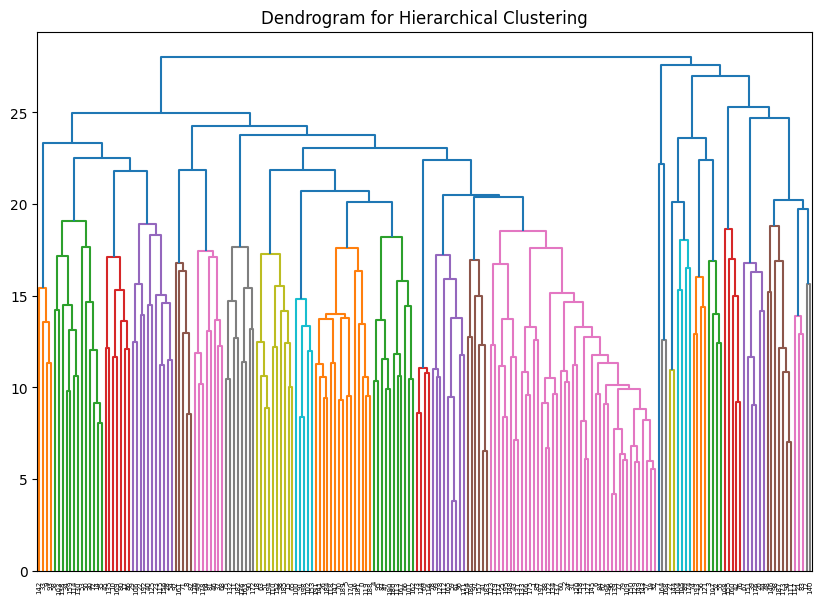

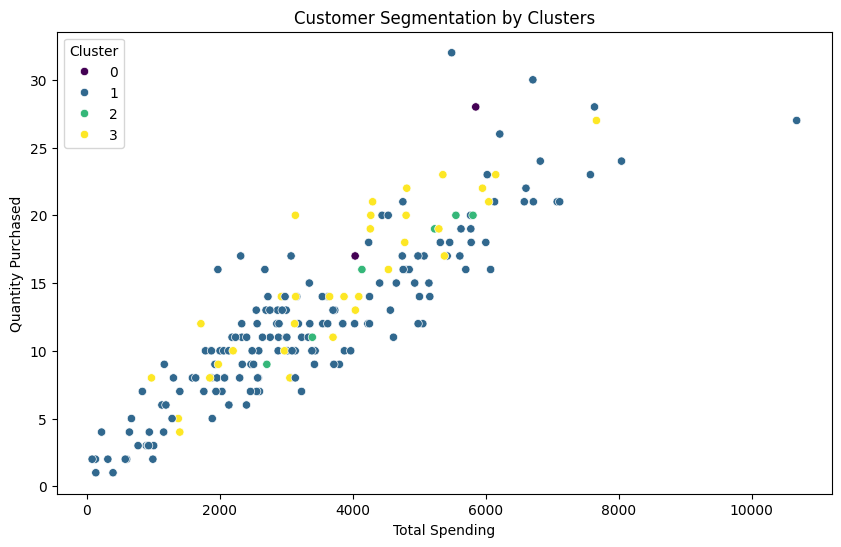

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


features = pd.read_csv('ProcessedFeatures.csv')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


features['Cluster'] = clusters
print(features.head())


db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['TotalValue'], y=features['Quantity'], hue=features['Cluster'], palette='viridis')
plt.title('Customer Segmentation by Clusters')
plt.xlabel('Total Spending')
plt.ylabel('Quantity Purchased')
plt.show()
